For this exercise, you need to implement the Feed-Forward-Network first.

Below you find a step-by-step tutorial for how to build the backpropagation algorithm from scratch, based on the simple, 2-layer, feed- forward network that you have already created.

In [1]:
import numpy as np

- Step 1

Let’s start with a toy data set. The “make moons” data set in sklearn is a nice example for this exercise, since it’s simple and also resembles the non-linear “XOR” problem.

Create some training data:

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [3]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

- Step 2

Make a scatterplot of the 2 columns of X data.
Color the data points according to the labels (y).
Hint The plt.scatter() function does a good job plotting NumPy arrays.
The data should look like this:

In [4]:
import matplotlib.pyplot as plt\

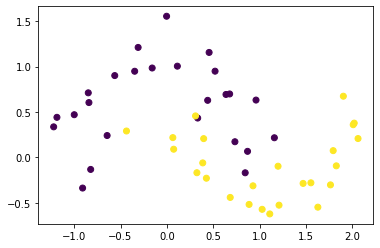

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

- Step 3

Since we are modeling our data set with a bias (all ones), we need to add a third column to our X array.

Use NumPy to “horizontally stack” an extra column for the bias onto your input:

X = np.hstack([X, np.ones((X.shape[0], 1))])

In [6]:
import numpy as np

In [7]:
# manually add a column for bias
X = np.hstack([X, np.ones((X.shape[0], 1))])

- Step 4

In our simple feed-forward network, we’ll be using the sigmoid activation function for all 3 of our neurons. Remember the sigmoid function from way back in Logistic Regression?

Write a python function, sigmoid, that accepts a NumPy array as an input, and returns a NumPy array where all of the original values have been transformed by the sigmoid / logistic function (or, as 3Blue1Brown would call it, the “squishification” function).

def sigmoid(x):

    ...


You’ll know if you wrote it correctly if the following code doesn’t throw an assertion error:


a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])

expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])

assert np.all(sigmoid(a).round(2) == expected)

In [8]:
# let's model our neurons/ activation functions as a sigmoid function

def sigmoid(x):
    '''logistic function
        takes in a single number, and squishes it
        between 0 and 1.'''
    
    return 1 / (1 + np.exp(-x))

In [9]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])

assert np.all(sigmoid(a).round(2) == expected)

- Step 5

Refer again to the image of network we’re trying to build. What about all the neural connections / arrows? Those are our weights.

These weights should also be represented by NumPy arrays, since they will multiplied (i.e. dot product) by input values before getting passed into an activation function.

Initialize the network with random weights (for both the hidden and output layers).

Hint (questions to help guide you):
- In our simple network, how many weights should we have, in total?
- How many weights are in the hidden layer, and how many in the output layer?
- If we represent the weights for each layer with a separate numpy array, what should its shape be, given that – for example – the first layer has 3 inputs that feed 2 neurons?

In [10]:
# the values of the arrows == weights/ parameters

In [11]:
hidden_weights = np.random.rand(3, 2)    # 3 inputs feeding into 2 neurons
outer_weights = np.random.rand(3, 1)     # 3 inputs feeding into 1 neuron   

- Step 6

Connect all the pieces and “build” the network!

Wrap everything into a python function that “runs” the feed-forward network from beginning to end one time. This function should accept the input data as an argument, as well as the initial random weights.

In the annotated template code below, the weights are assumed to be a single argument (e.g. a list of a NumPy arrays), but this of course could be split into separate arguments.

In [12]:
weights = [hidden_weights, outer_weights]

In [13]:
weights

[array([[0.65765254, 0.31590635],
        [0.61070404, 0.568069  ],
        [0.50535892, 0.98439387]]),
 array([[0.49170027],
        [0.25820893],
        [0.2464295 ]])]

In [14]:
def feed_forward(X, weights):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    
    #1
    step1 = np.dot(X, weights[0])
    
    #2
    step2 = sigmoid(step1)
    
    #3
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])
    
    #4 
    step4 = np.dot(step3, weights[1])
    
    #5
    step5 = sigmoid(step4)
    
    #6

    return step2, step5

## Part2: Training the Neural Network

- Using an algorithm like Gradient Descent
- General idea is to slowly (in increments) tweak the parameters such that the prediction is better than before.

#### Step 1: Debugging Check

Run your code for the Feed-Forward-Network and make sure it works.

In [15]:
out1, out2 = feed_forward(X, weights)

#### Step 2: Write a Loss Function

The first thing we’ll need is a loss function. In the gradient descent lesson earlier in the course, we used the mean-squared-error (MSE) as our loss function, which we wanted to minimize. In this case, however, because we are doing a classification problem with a sigmoid activation function as the final layer, we won’t use MSE, but rather the log-loss. The log-loss quantifies how far away are we from the real labels / correct result.

According to sklearn: Log-loss is the “function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.”

Here’s the formula for log-loss. The first task is to transcribe this formula into a Python function.

loss=−(ytrue∗log(ypred)+(1−ytrue)∗log(1−ypred))

In [16]:
def log_loss(ytrue, ypred):
    
    ''' return the log loss
        '''
    loss = -(ytrue * np.log(ypred) + (1-ytrue) * np.log(1-ypred))
    
    return loss

In [17]:
y_true = np.array([0.0, 0.0, 1.0, 1.0])
y_pred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])

assert np.all(log_loss(y_true, y_pred).round(2) == expected)

#### Step 3: Get Initial Loss

Run your feed-forward function, and try getting an array of log-loss values for each of your data points, compared to the actual labels. Note that you’ll need to reshape the ytrue values from a (N, ) array to a (N, 1) array (e.g. both the prediction and the actual values should be (50,1)). Make sure the shape of the loss values is also (N,1).

In [18]:
out1, out2 = feed_forward(X, weights)
ytrue = y.reshape(-1, 1)

In [19]:
ytrue.shape

(50, 1)

In [20]:
out2.shape

(50, 1)

In [21]:
init_loss = log_loss(ytrue, out2) 
init_loss.shape

(50, 1)

#### Step 4: Write a Backpropagation Function

Fill in the blanks of the following function, which transcribes the equations from earlier (equations A - E) to run one iteration of the backpropagation algorithm. It takes in a handful of arguments:

* the initial weights,
* the outputs from the feed-forward process (i.e. both the hidden output and the final output),
* the true labels,
* the input data,
* and the learning rates (we’ll have a separate learning rate for each layer of the network).

The function (representing a single iteration of the backpropagation algorithm), should return the modified hidden weights and the modified outer weights.

In [22]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             LR_O,
             LR_H):
    
    #separate learning rates for outer and inner weights.
    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    ytrue = ytrue.reshape(-1, 1)
    error = (output2 - ytrue) * log_loss(ytrue ,output2)

    '''EQUATION B:'''
    sig_deriv = output2 * (1 - output2)
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''EQUATION C:'''
    hidden_out_with_bias = np.hstack([output1,np.ones((output1.shape[0],1))])
    #don't forget the bias!
    delta_wo = np.dot(-y_grad.transpose(), hidden_out_with_bias) * LR_O

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.transpose()

    '''EQUATION D:'''
    sig_deriv_2 = output1 * (1 - output1)
    H_grad = sig_deriv_2  * np.dot(y_grad, wO_new[:2].transpose())
    #exclude the bias (3rd column) of the outer weights,
    #since it is not backpropagated!

    '''EQUATION E:'''
    delta_wH = np.dot(-H_grad.transpose(), X_input) * LR_H
    wH_new = wH + delta_wH.transpose()
    #old weights + delta weights -> new weights!

    return wH_new, wO_new

In [23]:
backprop(weights, out1, out2, y, X, 0.1, 5.0)

(array([[ 0.90981324,  0.28919528],
        [ 0.02807023,  0.62635496],
        [-0.38665316,  1.07602995]]),
 array([[ 0.24093084],
        [-0.030133  ],
        [-0.12143335]]))

In [24]:
wH_new, wO_new = backprop(weights, out1, out2, y, X, 0.1, 5.0)

In [25]:
new_weights = [wH_new, wO_new]

In [26]:
print(new_weights[0].shape, new_weights[1].shape)
#shapes look right!!

(3, 2) (3, 1)


#### Step 5: Run the Backpropagation Algorithm

Run your backpropagation algorithm in a loop! Inside the loop:

Run your feed-forward function with the X data and the starting weights (which are initially random!).
Collect the total sum of the log-loss values into a list, so we can track them over time.
Run your backprop function to get the modified weights.
At the end of the loop, make your modified weights the new weights for the next cycle.

In [27]:
'''A nice way to manually calculate the accuracy of the initial guess:

- flatten both ytrue and ypred (so that they're both (50,) arrays)
- round the ypred (either up to 1 or down to 0)
- then compare them to eachother to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)'''

def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [28]:
hidden_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 2))   # 3 inputs feeding into 2 neurons
outer_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 1)) # 3 inputs feeding into 1 neuron
weights = [hidden_weights, outer_weights]

In [29]:
ACC_VEC = []
LOSS_VEC = []

for i in range(500):
    out1, out2 =  feed_forward(X, weights)
    ACC_VEC.append(get_accuracy(out2,y))
    LOSS_VEC.append(sum(log_loss(y, out2))[0])
    new_weights = backprop(weights,out1,out2,y,X, 0.01, 5)
    weights = new_weights

#### Step 6: Plot Results

Use matplotlib to plot the loss of your network over each iteration (i.e. epoch).

BONUS: Write a function that calculates the accuracy of your model (hint: you’ll have to round your probabilities up/down to 1/0). Include this function in your loop so that you can also plot accuracy over each epoch. How high can you get the accuracy?

Text(0.5, 1.0, 'ACCURACY OVER TRAINING EPOCHS')

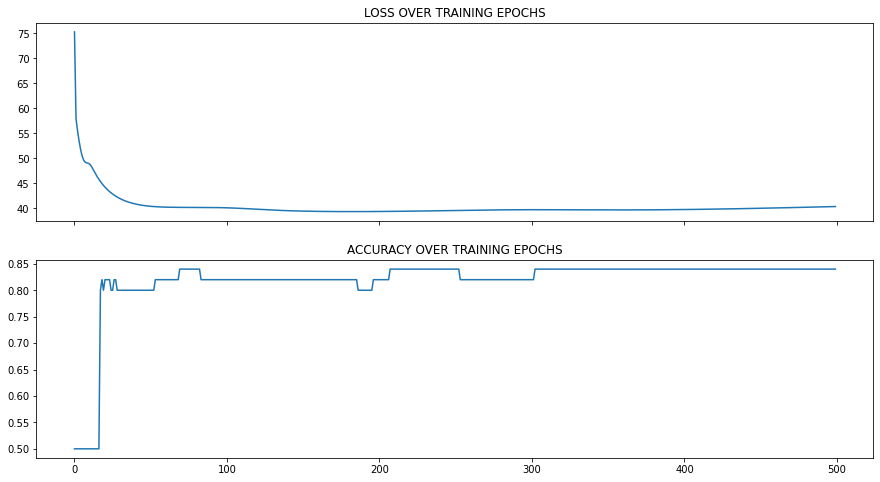

In [30]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 8))
ax1.plot(LOSS_VEC)
ax1.set_title('LOSS OVER TRAINING EPOCHS')
ax2.plot(ACC_VEC)
ax2.set_title('ACCURACY OVER TRAINING EPOCHS')